# Data preprocessing

## 3. Feature selection

In [25]:
from wordcloud import WordCloud
from collections import Counter

### 3.1 Tweets

In [24]:
tweets_processed = pickle.load(open( "../data/processed/tweets_processed.p", "rb" ))

In [46]:
tweets_processed["lenght"] = tweets_processed.text_preprocessed.progress_apply(len)

  0%|          | 0/305023 [00:00<?, ?it/s]

In [52]:
tweets_processed[tweets_processed.lenght == 2]

full_name  tweet_date       text_preprocessed  \
186     Ralph Brinkhaus  2020-09-19          [super, sache]   
276     Ralph Brinkhaus  2019-12-09    [abend, einschalten]   
286     Ralph Brinkhaus  2019-11-23         [live, leipzig]   
342     Ralph Brinkhaus  2019-02-28      [dank, liveticker]   
472     Ralph Brinkhaus  2016-04-19             [fair, maß]   
...                 ...         ...                     ...   
339548   Leif-Erik Holm  2018-02-02        [bundestag, afd]   
339584   Leif-Erik Holm  2017-12-13       [rede, bundestag]   
339622   Leif-Erik Holm  2017-10-17          [ärmel, drauf]   
339667   Leif-Erik Holm  2017-05-31          [hofheim, mai]   
339673   Leif-Erik Holm  2016-09-03  [wayne, interessieren]   

       text_preprocessed_sentence  lenght  
186                   super sache       2  
276             abend einschalten       2  
286                  live leipzig       2  
342               dank liveticker       2  
472                      fair maß       2  
...                           ...     ...  
339548              bundestag afd       2  
339584             rede bundestag       2  
339622                ärmel drauf       2  
339667                hofheim mai       2  
339673        wayne interessieren       2  

[23382 rows x 5 columns]

In [49]:
tweets_processed.groupby("lenght").size()

lenght
1     19465
2     23382
3     23831
4     24894
5     26523
6     27161
7     26056
8     22488
9     17888
10    13578
11    10558
12     9805
13     9704
14    10159
15     9982
16     9171
17     7537
18     5413
19     3621
20     1933
21     1044
22      472
23      208
24       87
25       28
26       17
27        8
28        2
29        4
30        1
31        1
32        1
39        1
dtype: int64

array([[<AxesSubplot:title={'center':'lenght'}>]], dtype=object)

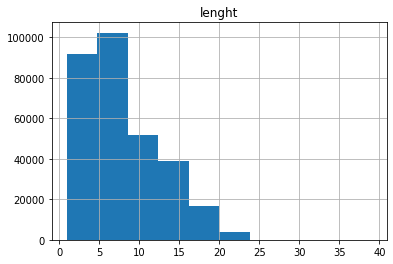

In [48]:
tweets_processed.hist()

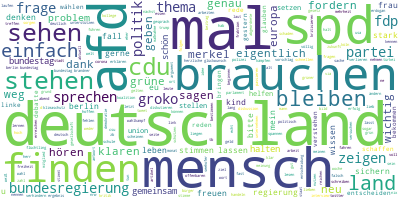

In [26]:
long_string_tweets = ' '.join(tweets_processed["text_preprocessed_sentence"].tolist())
wordcloud_tweets = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud_tweets.generate(long_string_tweets)
wordcloud_tweets.to_image()

In [27]:
counter_tweets = Counter(long_string_tweets.split())

In [28]:
counter_tweets.most_common(100)

[('mal', 12657),
 ('afd', 11834),
 ('bundestag', 10671),
 ('mensch', 9681),
 ('deutschland', 8844),
 ('spd', 8705),
 ('brauchen', 7623),
 ('cdu', 7426),
 ('berlin', 7073),
 ('dank', 6470),
 ('stehen', 6284),
 ('land', 6143),
 ('fdp', 5598),
 ('finden', 5565),
 ('sehen', 5523),
 ('frage', 5433),
 ('merkel', 5387),
 ('bleiben', 5198),
 ('bundesregierung', 5102),
 ('mein', 4946),
 ('einfach', 4914),
 ('zeigen', 4785),
 ('thema', 4647),
 ('partei', 4636),
 ('wichtig', 4584),
 ('politik', 4495),
 ('genau', 4211),
 ('kind', 4197),
 ('frau', 4123),
 ('klaren', 4040),
 ('weg', 4032),
 ('grüne', 3902),
 ('demokratie', 3892),
 ('leben', 3825),
 ('europa', 3812),
 ('sprechen', 3806),
 ('groko', 3753),
 ('lassen', 3690),
 ('geben', 3686),
 ('eigentlich', 3663),
 ('gut', 3607),
 ('glückwunsch', 3570),
 ('problem', 3507),
 ('wählen', 3481),
 ('neu', 3459),
 ('linke', 3446),
 ('freuen', 3393),
 ('rede', 3302),
 ('gemeinsam', 3294),
 ('grüner', 3257),
 ('stark', 3248),
 ('fordern', 3242),
 ('woche', 3

### 3.2 Speeches

In [ ]:
speeches_processed = pickle.load(open( "../data/processed/speeches_processed.p", "rb" ))

In [53]:
speeches_processed["lenght"] = speeches_processed.text_preprocessed.progress_apply(len)

  0%|          | 0/4026 [00:00<?, ?it/s]

Problem: Viel mehr Tweets als Reden

In [55]:
speeches_processed.groupby("lenght").size()

lenght
1       114
2        56
3        51
4        48
5        52
       ... 
1248      1
1394      1
1482      1
1564      1
1673      1
Length: 602, dtype: int64

array([[<AxesSubplot:title={'center':'speech_date'}>,
        <AxesSubplot:title={'center':'lenght'}>]], dtype=object)

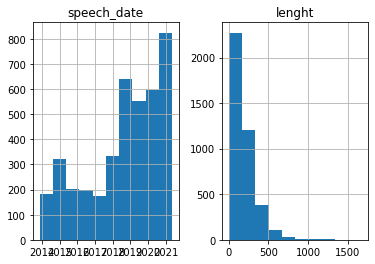

In [56]:
speeches_processed.hist()

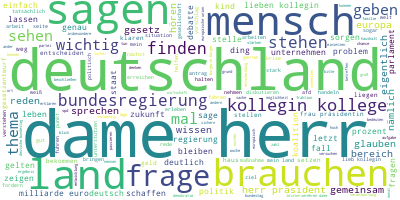

In [29]:
long_string_speeches = ' '.join(speeches_processed["text_preprocessed_sentence"].tolist())
wordcloud_speeches = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud_speeches.generate(long_string_speeches)
wordcloud_speeches.to_image()

In [30]:
counter_speeches = Counter(long_string_speeches.split())

In [69]:
counter_speeches.most_common(10)

[('herr', 8568),
 ('dame', 4594),
 ('land', 4533),
 ('mensch', 4353),
 ('deutschland', 3969),
 ('kollege', 3588),
 ('frau', 3588),
 ('sagen', 3512),
 ('frage', 2937),
 ('kollegin', 2607)]

## 4. Topic Modelling

State of the Art is [LDA](https://journalofbigdata.springeropen.com/track/pdf/10.1186/s40537-019-0255-7.pdf). Other approaches we try is Non Negative Matrix factorization and Bertopic. 

In [70]:
tweets_processed = pickle.load(open( "../data/processed/tweets_processed.p", "rb" ))
speeches_processed = pickle.load(open( "../data/processed/speeches_processed.p", "rb" ))

### 4.1 Latent Dirichlet Allocation

In [72]:
from pprint import pprint
from imp import reload
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models

#### 4.1.1 Twitter

In [74]:
id2word_twitter = corpora.Dictionary(tweets_raw.text_preprocessed.to_list())
id2word_twitter.filter_extremes(no_below=10, no_above=0.1)
texts_twitter = tweets_raw.text_preprocessed.to_list()
corpus_twitter = [id2word_twitter.doc2bow(text) for text in texts_twitter]

In [75]:
# number of topics
num_topics = 40
# Build LDA model
lda_model_twitter = gensim.models.LdaMulticore(corpus=corpus_twitter,
                                               id2word=id2word_twitter,
                                               num_topics=num_topics)
# Print the Keyword in the 100 topics
pprint(lda_model_twitter.print_topics())
doc_lda_twitter = lda_model_twitter[corpus_twitter]

[(0,
  '0.058*"glückwunsch" + 0.041*"herzliche" + 0.022*"cl" + 0.012*"studie" + '
  '0.011*"wahl" + 0.010*"beziehen" + 0.009*"zitat" + 0.009*"lieb" + '
  '0.008*"diktatur" + 0.008*"hab"'),
 (12,
  '0.025*"wählen" + 0.016*"ablehnen" + 0.013*"demo" + 0.010*"glauben" + '
  '0.010*"wirtschaft" + 0.009*"bundestag" + 0.009*"soli" + 0.009*"zustimmen" + '
  '0.008*"spd" + 0.008*"deutschland"'),
 (26,
  '0.021*"freiheit" + 0.021*"mensch" + 0.018*"rassismus" + 0.017*"demokratie" '
  '+ 0.014*"afd" + 0.013*"zahlen" + 0.013*"europa" + 0.013*"syrien" + '
  '0.012*"abschaffen" + 0.012*"krieg"'),
 (34,
  '0.017*"schlimm" + 0.014*"sowas" + 0.014*"frei" + 0.012*"netzdg" + '
  '0.009*"antifa" + 0.009*"kultur" + 0.008*"mensch" + 0.007*"zumindest" + '
  '0.007*"bundestag" + 0.007*"mal"'),
 (38,
  '0.013*"freuen" + 0.012*"wahrheit" + 0.012*"csu" + 0.011*"urteil" + '
  '0.010*"söder" + 0.009*"laschet" + 0.009*"spd" + 0.008*"liberal" + '
  '0.008*"trump" + 0.008*"abschaffung"'),
 (1,
  '0.090*"afd" + 0.031*"

In [76]:
pyLDAvis.enable_notebook()
LDAvis_prepared_twitter = pyLDAvis.gensim_models.prepare(lda_model_twitter, corpus_twitter, id2word_twitter)
LDAvis_prepared_twitter

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
6     -0.127631  0.046907       1        1  3.557239
26     0.099920 -0.013456       2        1  3.297702
11     0.024394  0.029831       3        1  3.003081
1     -0.074386 -0.101283       4        1  2.975998
7      0.129248  0.103870       5        1  2.821882
14    -0.052934  0.048183       6        1  2.742320
12    -0.043479  0.103306       7        1  2.692947
31     0.059325  0.046866       8        1  2.674356
16    -0.079460  0.081759       9        1  2.640063
8      0.103662 -0.034608      10        1  2.630584
2     -0.155305 -0.001112      11        1  2.581543
10     0.008660  0.000390      12        1  2.546912
4      0.077290 -0.150958      13        1  2.536588
9      0.002494  0.007246      14        1  2.527467
22    -0.003970  0.035702      15        1  2.518416
33     0.033772 -0.014757      16        1  2.474024
35    -0.087889 -0.049401      17        1  2.471890
30     0.050461  0.019058      18        1  2.430731
19    -0.052667 -0.024215      19        1  2.428052
21     0.058019  0.073329      20        1  2.407709
36    -0.015104  0.037706      21        1  2.407389
15     0.035490  0.024280      22        1  2.403530
27     0.006628  0.004581      23        1  2.395729
38    -0.059710 -0.001464      24        1  2.389445
24    -0.047336  0.003387      25        1  2.383961
23    -0.044877 -0.005053      26        1  2.362445
29    -0.043547  0.020291      27        1  2.352758
20     0.004267 -0.074487      28        1  2.347724
34     0.101111  0.048169      29        1  2.334397
28    -0.039338 -0.008441      30        1  2.333303
39    -0.015698 -0.007385      31        1  2.299681
17    -0.002641 -0.120856      32        1  2.291575
25     0.060127  0.013939      33        1  2.276652
13     0.030091 -0.029245      34        1  2.261661
3      0.003475  0.004376      35        1  2.248517
0      0.006036 -0.116689      36        1  2.235505
5     -0.012263  0.070545      37        1  2.215938
37     0.047184 -0.079411      38        1  2.199558
32     0.045532  0.026375      39        1  2.197657
18    -0.028952 -0.017275      40        1  2.103070, topic_info=                 Term          Freq         Total Category  logprob  loglift
1499              afd  17500.000000  17500.000000  Default  30.0000  30.0000
1173             dank   6222.000000   6222.000000  Default  29.0000  29.0000
1270  bundesregierung   5973.000000   5973.000000  Default  28.0000  28.0000
2683         brandner   2659.000000   2659.000000  Default  27.0000  27.0000
13        glückwunsch   3387.000000   3387.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
264          sprechen    204.019388   3755.572345  Topic40  -5.3851   0.9490
1207            gerne    199.042997   3193.584008  Topic40  -5.4098   1.0864
2694             grün    188.276108   1565.805882  Topic40  -5.4654   1.7435
196            mensch    198.769355  10253.385795  Topic40  -5.4112  -0.0814
17          bundestag    190.157945  12182.525796  Topic40  -5.4555  -0.2981

[3065 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
13454     28  0.990020    abbrechen
12815     22  0.987267      abbruch
8961      20  0.987589       abgabe
8961      34  0.010735       abgabe
161        1  0.092350  abgeordnete
...      ...       ...          ...
4526      25  0.025653        übrig
4526      32  0.051305        übrig
4526      35  0.022446        übrig
4526      36  0.003207        übrig
4526      37  0.003207        übrig

[24374 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 27, 12, 2, 8, 15, 13, 32, 17, 9, 3, 11, 5, 10, 23, 34, 36, 31, 20, 22, 37, 16, 28, 39, 25, 24, 30, 21, 35, 29, 40, 18, 26, 14, 4, 1, 6, 38, 33, 19])

In [77]:
lda_model_twitter.save("../models/lda_twitter")

#### 4.1.2 Speeches

##### Single Example

In [108]:
# number of topics
num_topics_speeches = 40
# Build LDA model
lda_model_speeches = gensim.models.LdaMulticore(corpus=corpus_speeches,
                                       id2word=id2word_speeches,
                                       num_topics=num_topics_speeches)
# Print the Keyword in the 40 topics
# pprint(lda_model_speeches.print_topics())
doc_lda_speeches = lda_model_speeches[corpus_speeches]

In [114]:
from gensim.models import CoherenceModel
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
# Compute Coherence Score
coherence_model_lda_speeches = CoherenceModel(model=lda_model_speeches, texts=texts_speeches,
                                              dictionary=id2word_speeches, coherence='c_v')
coherence_lda_speeches = coherence_model_lda_speeches.get_coherence()
print('\nCoherence Score: ', coherence_lda_speeches)


Coherence Score:  0.23276148232458374


##### Optimization

In [78]:
id2word_speeches = corpora.Dictionary(speeches_subset.text_preprocessed.to_list())
id2word_speeches.filter_extremes(no_below=8, no_above=0.1)
texts_speeches = speeches_subset.text_preprocessed.to_list()
corpus_speeches = [id2word_speeches.doc2bow(text) for text in texts_speeches]

In [ ]:
# supporting function
def compute_coherence_values(corpus, text, id2word, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=42,
                                           alpha=a,
                                           eta=b)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [173]:
grid = {}
grid['Validation_Set'] = {}

In [174]:
# Topics range
min_topics = 10
max_topics = 150
step_size = 20
topics_range = range(min_topics, max_topics, step_size)

In [175]:
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3)) #
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

In [176]:
# Validation sets
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [177]:
for k in tqdm(topics_range):
    print("Number of topics:" + str(k))
    for a in tqdm(alpha):
        print("Alpha value:" + str(a))
        for b in tqdm(beta):
            print("Beta value:" + str(b))
            cv = compute_coherence_values(corpus=corpus_speeches,text = texts_speeches, id2word=id2word_speeches, k=k, a=a, b=b)
            model_results['Topics'].append(k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv)
pd.DataFrame(model_results).to_csv('..data/processed/lda_tuning_results.csv', index=False)

  0%|          | 0/7 [00:00<?, ?it/s]

Number of topics:10


  0%|          | 0/6 [00:00<?, ?it/s]

Alpha vlaue:0.01


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Alpha vlaue:0.31


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Alpha vlaue:0.61


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Alpha vlaue:0.9099999999999999


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Alpha vlaue:symmetric


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Alpha vlaue:asymmetric


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Number of topics:30


  0%|          | 0/6 [00:00<?, ?it/s]

Alpha vlaue:0.01


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Alpha vlaue:0.31


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Alpha vlaue:0.61


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Alpha vlaue:0.9099999999999999


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Alpha vlaue:symmetric


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61
Beta vlaue:0.9099999999999999
Beta vlaue:symmetric
Alpha vlaue:asymmetric


  0%|          | 0/5 [00:00<?, ?it/s]

Beta vlaue:0.01
Beta vlaue:0.31
Beta vlaue:0.61


rosetta error: thread_suspend failed
Process SpawnPoolWorker-1451:
Traceback (most recent call last):
  File "/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/multiprocessing/pool.py", line 109, in worker
    initializer(*initargs)
  File "/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/gensim/models/ldamulticore.py", line 341, in worker_e_step
    chunk_no, chunk, w_state = input_queue.get()
  File "/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/multiprocessing/queues.py", line 96, in get
    with self._rlock:
  File "/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Process

KeyboardInterrupt: 

Dauer Abhängig von Anzahl topics.  (30 = 16 sec,60 = 32 sec, 90 = 58 sec)

In [80]:
pyLDAvis.enable_notebook()
LDAvis_prepared_speeches = pyLDAvis.gensim_models.prepare(lda_model_speeches, corpus_speeches, id2word_speeches)
LDAvis_prepared_speeches

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3      0.011366  0.006072       1        1  6.486037
21    -0.004901 -0.004621       2        1  6.236908
14    -0.014026 -0.015297       3        1  6.171708
7      0.005711  0.014027       4        1  4.963456
25    -0.006631  0.016505       5        1  4.492357
22    -0.004654  0.015114       6        1  4.333300
19    -0.000604 -0.005426       7        1  4.266838
29    -0.005392  0.000507       8        1  3.974685
26     0.003773  0.005838       9        1  3.808986
30     0.012823 -0.016148      10        1  2.777775
38    -0.027453 -0.006950      11        1  2.770300
12     0.004795  0.002171      12        1  2.680232
36     0.015140 -0.010130      13        1  2.668787
39     0.004992  0.045048      14        1  2.597393
4      0.012449 -0.010512      15        1  2.208523
35     0.008296  0.001394      16        1  2.114592
11    -0.006255 -0.003005      17        1  2.079200
20    -0.028073  0.001406      18        1  1.974710
17     0.000468  0.010024      19        1  1.960653
33     0.004051  0.012348      20        1  1.930989
37     0.011671 -0.010359      21        1  1.913934
16    -0.010364 -0.000367      22        1  1.887924
6     -0.004173  0.002716      23        1  1.879708
18     0.017045 -0.009099      24        1  1.822864
2      0.003249 -0.023694      25        1  1.799248
28    -0.010212 -0.017899      26        1  1.685484
5      0.019895  0.014683      27        1  1.584260
8     -0.002835 -0.004467      28        1  1.523699
23     0.013057  0.004015      29        1  1.481050
32     0.005256 -0.004916      30        1  1.422223
15    -0.033089 -0.003180      31        1  1.403311
27    -0.001035  0.001485      32        1  1.364313
1      0.008226  0.023618      33        1  1.337448
10    -0.024512 -0.029157      34        1  1.290312
0      0.038047 -0.021874      35        1  1.274564
24    -0.030903  0.005265      36        1  1.270821
34    -0.001900  0.024479      37        1  1.255764
31     0.017776 -0.017302      38        1  1.240094
9     -0.006112  0.005875      39        1  1.110774
13     0.005036  0.001814      40        1  0.954775, topic_info=            Term        Freq       Total Category  logprob  loglift
1711     familie  680.000000  680.000000  Default  30.0000  30.0000
3282      türkei  544.000000  544.000000  Default  29.0000  29.0000
1637     kommune  608.000000  608.000000  Default  28.0000  28.0000
2573      pflege  404.000000  404.000000  Default  27.0000  27.0000
1592     bildung  592.000000  592.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
7385    pandemie    5.959832  419.160842  Topic40  -6.4556   0.3982
1711     familie    6.654264  680.317332  Topic40  -6.3454   0.0241
161        krise    6.441633  650.755501  Topic40  -6.3779   0.0361
1427        lage    6.148427  625.433682  Topic40  -6.4245   0.0292
67    demokratie    6.274670  798.517221  Topic40  -6.4042  -0.1948

[3074 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2445      1  0.094539  abarbeiten
2445      2  0.047269  abarbeiten
2445      4  0.094539  abarbeiten
2445      6  0.047269  abarbeiten
2445      7  0.047269  abarbeiten
...     ...       ...         ...
299      36  0.004932     übrigen
299      37  0.007398     übrigen
299      38  0.022194     übrigen
299      39  0.007398     übrigen
299      40  0.012330     übrigen

[33885 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 22, 15, 8, 26, 23, 20, 30, 27, 31, 39, 13, 37, 40, 5, 36, 12, 21, 18, 34, 38, 17, 7, 19, 3, 29, 6, 9, 24, 33, 16, 28, 2, 11, 1, 25, 35, 32, 10, 14])

In [36]:
lda_model_speeches.save("../models/lda_speeches")

### 4.2 Non Negative Matrix Factorization

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text

In [82]:
def display_topics(model, feature_names, num_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] \
             for i in topic.argsort()[:-num_top_words - 1:-1]]))

#### 4.2.1 Twitter

In [85]:
tfidf_vectorizer_tweets = TfidfVectorizer(max_df = .2, min_df = .01)
tweets_tfidf = tfidf_vectorizer_tweets.fit_transform(tweets_raw.text_preprocessed_sentence.tolist())

# Create an NMF instance: model
model_tweets = NMF(n_components=40)

# Fit the model to articles
model_tweets.fit(tweets_tfidf)

# Transform the articles: nmf_features
nmf_features_tweets = model_tweets.transform(tweets_tfidf)

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [88]:
# Create data-frame of Doc-Term Matrix with nouns as column names
components_df_tweets = pd.DataFrame(model_tweets.components_, columns=tfidf_vectorizer_tweets.get_feature_names())

# Display topics
display_topics(model_tweets, tfidf_vectorizer_tweets.get_feature_names(), 5)


Topic  0
mal, leben, gut, zeigen, einfach

Topic  1
afd, gut, groko, genau, geben

Topic  2
mensch, leben, gut, zeigen, geben

Topic  3
bundestag, gut, zeigen, einfach, genau

Topic  4
spd, zeigen, eigentlich, genau, geben

Topic  5
dank, gut, europa, zeigen, einfach

Topic  6
deutschland, europa, leben, gut, zeigen

Topic  7
brauchen, gut, europa, zeigen, einfach

Topic  8
cdu, gut, zeigen, einfach, genau

Topic  9
stehen, europa, gut, zeigen, eigentlich

Topic  10
berlin, leben, gut, europa, zeigen

Topic  11
sehen, gut, leben, europa, zeigen

Topic  12
finden, gut, leben, zeigen, glückwunsch

Topic  13
frage, gut, europa, leben, zeigen

Topic  14
land, leben, gut, europa, zeigen

Topic  15
fdp, gut, europa, zeigen, groko

Topic  16
merkel, europa, gut, glückwunsch, geben

Topic  17
bundesregierung, zeigen, eigentlich, genau, geben

Topic  18
bleiben, gut, europa, leben, zeigen

Topic  19
einfach, leben, gut, zeigen, glückwunsch

Topic  20
thema, europa, zeigen, eigentlich, genau

T

#### 4.2.2 Speeches

In [89]:
tfidf_vectorizer_speeches = TfidfVectorizer(max_df = .2, min_df = .01)
speeches_tfidf = tfidf_vectorizer_speeches.fit_transform(speeches_subset.text_preprocessed_sentence.tolist())

# Create an NMF instance: model
model_speeches = NMF(n_components=40)

# Fit the model to articles
model_speeches.fit(speeches_tfidf)

# Transform the articles: nmf_features
nmf_features_speeches = model_speeches.transform(speeches_tfidf)

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [90]:
# Create data-frame of Doc-Term Matrix with nouns as column names
components_df_speeches = pd.DataFrame(model_speeches.components_, columns=tfidf_vectorizer_speeches.get_feature_names())

# Display topics
display_topics(model_speeches, tfidf_vectorizer_speeches.get_feature_names(), 5)


Topic  0
energie, erneuerbaren, energiewende, klimaschutz, ziel

Topic  1
gerne, zwischenfrage, zusammenhang, redezeit, hinweis

Topic  2
europa, eu, griechenland, europäisch, welt

Topic  3
antrag, grüne, fdp, linke, fordern

Topic  4
bitte, schön, solange, verständnis, bringen

Topic  5
kind, eltern, jugendliche, schule, armut

Topic  6
soldat, bundeswehr, soldatinnen, einsatz, mandat

Topic  7
auffassung, fall, gespräch, verfahren, entscheidung

Topic  8
euro, milliarde, million, haushalt, geld

Topic  9
minister, kabinett, ministerin, anwesend, kanzleramt

Topic  10
pflege, versorgung, patient, arzt, schritt

Topic  11
türkei, erdogan, türkisch, syrien, waffe

Topic  12
arbeit, lieb, rente, grundsicherung, koalition

Topic  13
unternehmen, wirtschaft, beschäftigte, mittelständisch, konzern

Topic  14
bildung, schule, ministerin, geehrt, bund

Topic  15
schön, dank, genauso, linke, redezeit

Topic  16
pandemie, maßnahme, krise, virus, impfen

Topic  17
kommune, bund, flüchtling, ko

### 4.3.3 Bertopic

In [91]:
from bertopic import BERTopic

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ip

#### Speeches

In [92]:
topic_model_speeches = BERTopic(language = "German")
docs_speeches = speeches_subset.text_preprocessed_sentence.tolist()
topics_speeches, probs_speeches = topic_model_speeches.fit_transform(docs_speeches)

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/hdbscan/hdbscan_.py:275: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  alg = KDTreeBoruvkaAlgorithm(tree, min_samples, metric=metric,
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/hdbscan/hdbscan_.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in N

In [93]:
topic_model_speeches.get_topic_info()

Topic  Count                                               Name
0      -1   1264                            -1_herr_land_dame_sagen
1       0    552                    0_herr_dame_gesetzentwurf_frage
2       1    238                         1_herr_mensch_dame_deutsch
3       2    232    2_klimaschutz_energie_erneuerbaren_energiewende
4       3    171                     3_euro_deutschland_mensch_land
5       4    133           4_digital_datum_digitale_digitalisierung
6       5    100        5_rente_rentenversicherung_kollege_kollegin
7       6     96                   6_pandemie_virus_impfen_maßnahme
8       7     95              7_europa_europäische_europäisch_union
9       8     81  8_ärztlich_patient_patientenverfügung_einrichtung
10      9     79                   9_herr_dame_bundestag_demokratie
11     10     78              10_türkei_türkisch_erdogan_völkermord
12     11     75                             11_überrascht_sowohl__
13     12     63             12_präsident_herr_präsidentin_schwören
14     13     54                       13_kind_land_bildung_familie
15     14     53                     14_gerne_schön_heiß_jedenfalls
16     15     53                      15_frau_herr_dame_deutschland
17     16     53              16_russland_russisch_europa_russische
18     17     51               17_pflege_versorgung_patient_wichtig
19     18     42                  18_versorgung_pflege_patient_arzt
20     19     40                           19_afrika_deg_sudan_land
21     20     32                       20_bildung_kind_familie_herr
22     21     32                 21_flüchtling_kommune_sagen_mensch
23     22     30                       22_schön_bitte_dank_redezeit
24     23     28        23_homeoffice_arbeitgeber_mobil_miteinander
25     24     24                 24_wortmeldung_herr_hampeln_amthor
26     25     24  25_falte_friedensdividende_absolutistisch_absc...
27     26     24   26_marktwirtschaft_wirtschaft_bürger_unternehmen
28     27     23                 27_iran_nuklear_atomwaffen_abkomme
29     28     22              28_großbritannien_brexit_europa_union
30     29     22                 29_einsatz_soldat_soldatinnen_mali
31     30     20              30_israel_hisbollah_staat_deutschland
32     31     18           31_zwischenfrage_frage_beantworten_gerne
33     32     18        32_bundeswehr_soldat_soldatinnen_ministerin
35     33     16  33_urteil_parlament_akkreditierungsstelle_akkr...
34     34     16                            34_iran_syrien_usa_irak
36     35     15                   35_bitte_verzeihung_gerne_soweit
37     36     15                       36_kind_test_eingriff_masern
38     37     15   37_religionsfreiheit_religiös_moschee_islamismus
39     38     14          38_coronakrise_pandemie_parlament_kollege
40     39     14     39_migration_pakt_flüchtling_migrationspolitik
41     40     13      40_china_hongkong_chinesisch_meinungsfreiheit
42     41     13           41_afghanistan_afghanisch_taliban_soldat
43     42     13     42_cannabis_rauchen_tabakindustrie_werbeverbot
44     43     12     43_umsetzung_artikel_verabschieden_deutschland
45     44     12  44_verwertungsgesellschaften_verwertungsgesell...
46     45     11           45_erdogan_hochinteressante_bmvi_aufgabe

In [94]:
topic_model_speeches.visualize_topics()

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [95]:
topic_model_speeches.save("../models/bertopic_speeches")

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



#### Twitter

In [ ]:
topic_model_tweets = BERTopic(language = "German")
docs_tweets = tweets_raw.text_preprocessed_sentence.tolist()
topics_tweets, probs_tweets = topic_model_tweets.fit_transform(docs_tweets)

In [ ]:
topic_model_tweets.get_topic_info()

In [ ]:
topic_model_tweets.visualize_topics()

In [ ]:
topic_model_tweets.save("../models/bertopic_speeches")

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/setuptools/

No perplexity as not so good( Wallach et al. (ICML 2009))

We will use coherence as automatic measure. (Maybe tf-idf coherence)